<a href="https://colab.research.google.com/github/kenneth-003/Kiwanukakenneth/blob/main/KIWANUKA_KENNETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data using all of the features.
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load Data

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfsaRE3Pq4HcnCgIb5hgszzYNcKQBoypmZm2zW9Q9hU9-tWdtP8qxBBsiUWMFKzG66unPOdi-lfKdM/pub?gid=794640114&single=true&output=csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# 3. Drop Unnecessary Columns

In [7]:
df.columns


Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [8]:
#dropping the unneccessary columns
df.drop(columns=["Unnamed: 0", 'Defaulted'], inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
2,3,33,2,10,57,6.111,5.802,20.9
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2


# 4. EDA and Cleaning

In [9]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 53.3 KB


In [11]:
#Check for null values
print(df.isnull().sum())

#Check for duplicated rows
print(f'Duplicated rows: {df.duplicated().sum()}')

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64
Duplicated rows: 0


# 5. Scale Data

In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Display the first 5 rows of the scaled data
print("Scaled Data:")
print(scaled_df[:5])

Scaled Data:
[[-1.7300143   0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116
  -0.59048916 -0.57652509]
 [-1.72593888  1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366
   1.51296181  0.39138677]
 [-1.72186347 -0.25251804  0.31212243  0.2117124   0.26803233  2.13414111
   0.80170393  1.59755385]
 [-1.71778805 -0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323
  -0.75446707 -0.57652509]
 [-1.71371263  1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032
   1.71609424 -0.44250653]]


# 6. Tune a KMeans Model and Cluster the Scaled Data Using All Features

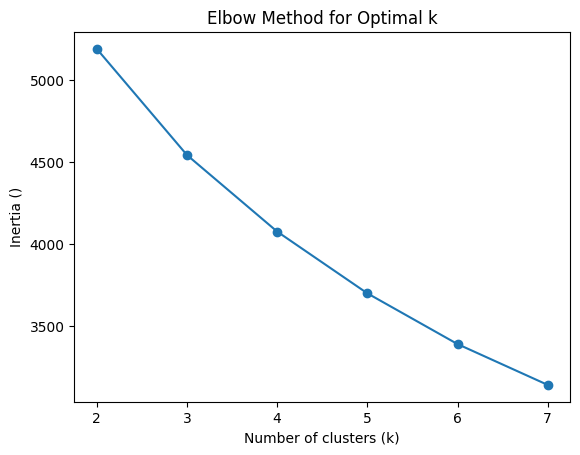

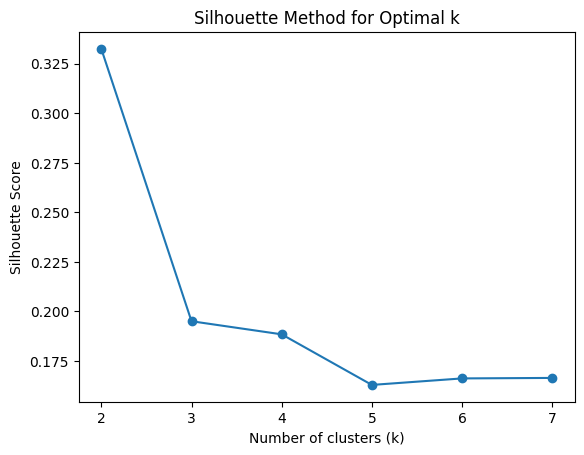

Final model trained with k=5


In [19]:
inertia = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=20, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia ()")
plt.title("Elbow Method for Optimal k")
plt.show()

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=20, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

best_k = 5
final_model = KMeans(n_clusters=best_k, init="k-means++", n_init=20, random_state=42)
final_labels = final_model.fit_predict(scaled_df)

print(f"Final model trained with k={best_k}")


# 7. Transform the Scaled Data with PCA

In [20]:
# Initialize PCA and fit to the scaled data
pca = PCA()
pca_data = pca.fit_transform(scaled_df)


# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:, 0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:, 1]`

- The `c` argument should be the labels from the kmeans model.

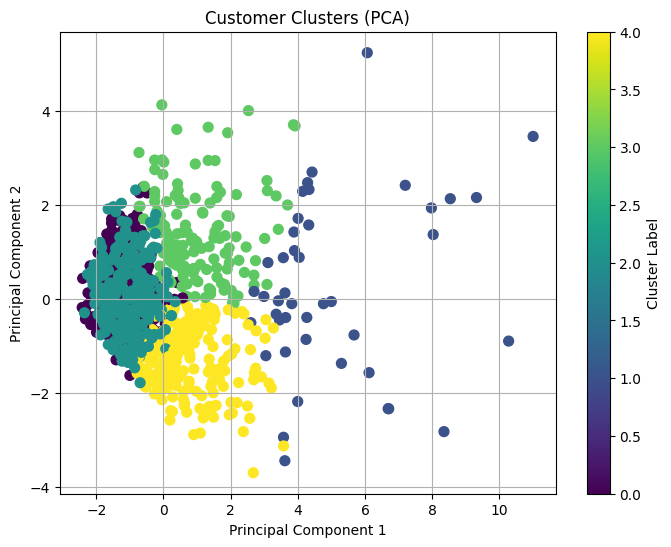

In [21]:
# Create a scatter plot of the first 2 principal components, colored by KMeans labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis', s=50)
plt.title('Customer Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [17]:
# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    z=pca_data[:, 2],
    color=final_labels.astype(str), # Convert labels to string for categorical coloring
    title='Customer Clusters (3D PCA)',
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3', 'color': 'Cluster Label'}
)

fig.show()